In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = pd.read_csv('adult.csv')
print("Null values per column:")
print(data.isnull().sum())

Null values per column:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [5]:
data = data.drop(columns=['fnlwgt'])

In [7]:
data['income'] = data['income'].apply(lambda x: 1 if x.strip() ==
'>50K' else 0)

In [9]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
 unique_values = data[col].unique()
 mapping = {value: idx for idx, value in enumerate(unique_values)}
 data[col] = data[col].map(mapping)

In [11]:
X = data.drop('income', axis=1).values
y = data['income'].values

In [13]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

In [15]:
def train_test_split_manual(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_index = int(X.shape[0] * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

In [17]:
X_train, X_test, y_train, y_test = train_test_split_manual(X_scaled,
y, test_size=0.2, random_state=42)

In [19]:
model = Sequential([
 Dense(60, activation='relu', input_shape=(X_train.shape[1],)),
 Dense(30, activation='relu'),
 Dense(15, activation='relu'),
 Dense(7, activation='relu'),
 Dense(1, activation='sigmoid')
])

C:\Users\sajee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 60)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,255 (12.71 KB)

 Trainable params: 3,255 (12.71 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=50, batch_size=30,
validation_split=0.2, verbose=1)

Epoch 1/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8105 - loss: 0.4055 - val_accuracy: 0.8412 - val_loss: 0.3343
Epoch 2/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8478 - loss: 0.3216 - val_accuracy: 0.8522 - val_loss: 0.3250
Epoch 3/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8485 - loss: 0.3238 - val_accuracy: 0.8528 - val_loss: 0.3224
Epoch 4/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8571 - loss: 0.3097 - val_accuracy: 0.8522 - val_loss: 0.3214
Epoch 5/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8553 - loss: 0.3143 - val_accuracy: 0.8535 - val_loss: 0.3208
Epoch 6/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8586 - loss: 0.3101 - val_accuracy: 0.8531 - val_loss: 0.3209
Epoch 7/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8599 - loss: 0.3081 - val_accuracy: 0.8537 - val_loss: 0.3184
Epoch 8/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8607 - loss: 0.3014 -

In [31]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Accuracy over Epochs')

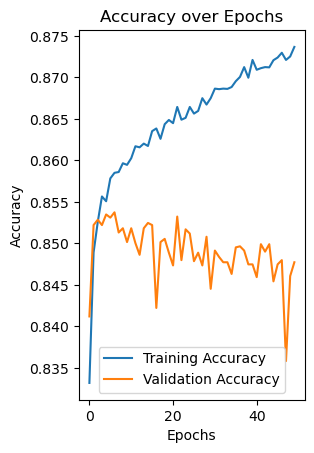

In [33]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

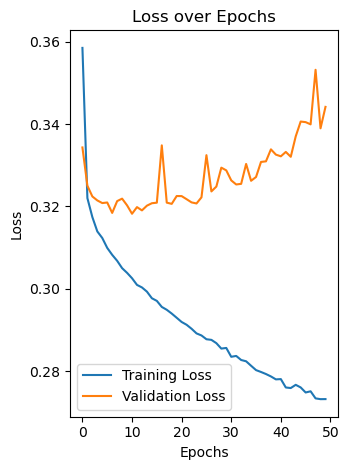

In [35]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.tight_layout()
plt.show()

In [37]:
def tanh(x):
 return np.tanh(x)

In [39]:
def tanh_derivative(x):
 return 1 - np.tanh(x) ** 2

In [41]:
def elu(x, alpha=1.0):
 return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

In [43]:
def elu_derivative(x, alpha=1.0):
 return np.where(x >= 0, 1, alpha * np.exp(x))

In [45]:
x_vals = np.linspace(-10, 10, 100)

In [47]:
outputs_tanh = tanh(x_vals)
derivatives_tanh = tanh_derivative(x_vals)
outputs_elu = elu(x_vals)
derivatives_elu = elu_derivative(x_vals)

In [49]:
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

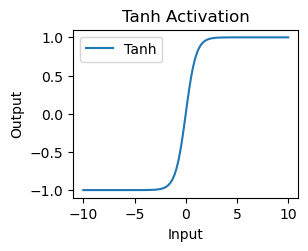

In [51]:
plt.subplot(2, 2, 1)
plt.plot(x_vals, outputs_tanh, label='Tanh')
plt.title('Tanh Activation')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

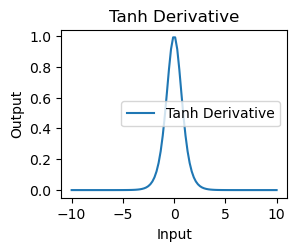

In [53]:
plt.subplot(2, 2, 2)
plt.plot(x_vals, derivatives_tanh, label='Tanh Derivative')
plt.title('Tanh Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

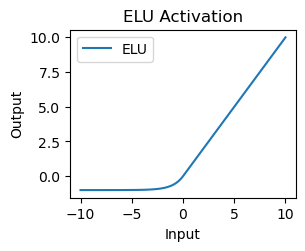

In [55]:
plt.subplot(2, 2, 3)
plt.plot(x_vals, outputs_elu, label='ELU')
plt.title('ELU Activation')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()